## Fake News Project
Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

1. What is a Fake News?

  - Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas. For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.In this project, we are using some machine learning and Natural language processing libraries like NLTK, re (Regular Expression), Scikit Learn.
  

2. Natural Language Processing
  
  - Machine learning data only works with numerical features so we have to convert text data into numerical columns. So we have to preprocess the text and that is called natural language processing. In-text preprocess we are cleaning our text by steaming, lemmatization, remove stopwords, remove special symbols and numbers, etc. After cleaning the data we have to feed this text data into a vectorizer which will convert this text data into numerical features.

3. About Dataset
  
  - There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, there is 23481 news. We have to insert one label column zero for fake news and one for true news. We have to combine both datasets using pandas built-in function.


In [1]:
# Loading Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display maximum columns and Rows 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

# Loading Data Frame
df1=pd.read_csv(r"C:\Users\rutuj\Desktop\DATA SCIENCE\Internship\Fake News Project\True.csv")

#### LOADING TRUE DATA SET

In [3]:
# adding new column Named True as they are True news
df1['Class_Labels']="True"

In [4]:
df1.head()

,title,text,subject,date,Class_Labels
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [5]:
df1.tail()

,title,text,subject,date,Class_Labels
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",True


### LOADING FAKE DATA SET

In [6]:
# Loading Fake news 
df2=pd.read_csv(r"C:\Users\rutuj\Desktop\DATA SCIENCE\Internship\Fake News Project\Fake.csv")

In [7]:
# Adding new columns as Class Labels named false as it contains false news
df2['Class_Labels']="Fake"

In [8]:
df2.head()

,title,text,subject,date,Class_Labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [9]:
df2.tail()

,title,text,subject,date,Class_Labels
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


### Merging Data Sets

In [10]:
# Merging True and Fake News column wise
df= pd.concat([df1,df2], ignore_index=True)

In [11]:
df.head()

,title,text,subject,date,Class_Labels
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


### ABOUT DATA SET

In [12]:
print("Info Data Frame")
print("******"*10)
print("Shape of Data Frame",df.shape,"\nSize of Data Frame",df.size,"\nDimension of Data Frame",df.ndim,)
print("\nData Frame Having a total Columns of {} and total Rows of {}".format(df.shape[0],df.shape[1]))

Info Data Frame
************************************************************
Shape of Data Frame (44898, 5) 
Size of Data Frame 224490 
Dimension of Data Frame 2

Data Frame Having a total Columns of 44898 and total Rows of 5


In [13]:
# printing columns

print("Total Columns\n",df.columns)

Total Columns
 Index(['title', 'text', 'subject', 'date', 'Class_Labels'], dtype='object')


In [14]:
# Data Set Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         44898 non-null  object
 1   text          44898 non-null  object
 2   subject       44898 non-null  object
 3   date          44898 non-null  object
 4   Class_Labels  44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


### Observations
- This Data Set contains 5 columns
- Size of the Data Set 1.8 MB

#### Finding N-Unique Values

In [15]:
# unique
total_counts=pd.DataFrame(df.nunique(axis=0),columns=["Counts"])
total_counts

,Counts
title,38729
text,38646
subject,8
date,2397
Class_Labels,2


### Duplicated Rows

In [16]:
print("Their are {} duplicated values".format(df.duplicated().sum()))

Their are 209 duplicated values


In [17]:
print("Printing First Duplicated Rows",df[df.duplicated(keep="first")].shape[0])
print("Printing Last Duplicated Rows",df[df.duplicated(keep="last")].shape[0])

Printing First Duplicated Rows 209
Printing Last Duplicated Rows 209


In [18]:
# dropping
print("Droping Duplicated Rows",df.drop_duplicates(inplace=True))

# after dropping
print("Droping Total Duplicated Rows",df.duplicated().sum())

Droping Duplicated Rows None
Droping Total Duplicated Rows 0


## Checking Null Values and Missing Percentage

In [19]:
#creating data frame of missing values and missing percentage
Missing=pd.DataFrame(data={"Missing Value":df.isnull().sum(),"Missing Percentage":(df.isnull().sum()/df.shape[0])*100})
Missing

,Missing Value,Missing Percentage
title,0,0.0
text,0,0.0
subject,0,0.0
date,0,0.0
Class_Labels,0,0.0


### Observation

- Shows No Missing Values

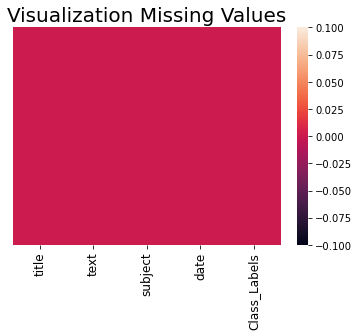

In [20]:
# Null Value Visualization
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("Visualization Missing Values",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0)
plt.show()

In [21]:
# droping columns that don't add much to model
df.drop('title',axis=1,inplace=True)

In [22]:
# checking if rows containts zeros
df[df==0].sum().sum()

0

In [23]:
print("Checking if any row shows empty")
df[df['text']==' '].shape[0]

Checking if any row shows empty


627

### Data Pre-Processing

In [24]:
# drawing year in year column
df['year']=[str(i).split()[-1] for i in df['date']]

# drawing month in month column
df['month']=[str(i).split()[0] for i in df['date']]

In [25]:
# drawing month and day from date
df['day']=[str(i).split(',')[0] for i in df['date']]

# drawing day from day column
df['day']=[str(i).split()[-1] for i in df['day']]

In [26]:
column=['day', 'month', 'year']
for i in column:
    print("COLUMN:",i,"\n",df[i].unique())
    print("\n")

COLUMN: day 
 ['31' '29' '30' '28' '25' '27' '26' '24' '23' '22' '21' '19' '20' '18'
 '15' '16' '17' '14' '13' '12' '11' '10' '8' '9' '7' '6' '5' '4' '3' '1'
 '2' '19-Feb-18' '18-Feb-18' '17-Feb-18' '16-Feb-18' '15-Feb-18'
 '14-Feb-18'
 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/'
 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/'
 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/'
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg'
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg'
 '[Video]']


COLUMN: month 
 ['December' 'November' 'October' 'September' 'August' 'July' 'June' 'May'
 'April' 'March' 'February' 'January' '19-Feb-18' '18-Feb-18' '17-Feb-18'
 '16-Feb-18' '15-Feb-18' '14-Feb-18' 'Dec' '

In [27]:
df.head()

,text,subject,date,Class_Labels,year,month,day
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,2017,December,31
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,2017,December,29
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,2017,December,31
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,2017,December,30
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,2017,December,29


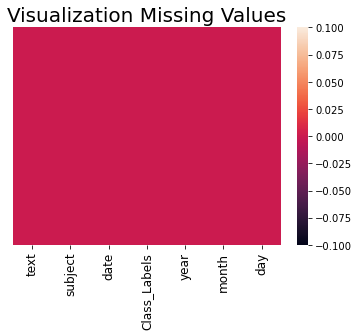

In [28]:
# Null Value Visualization
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("Visualization Missing Values",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0)
plt.show()

### Exploratory Data Analysis

#### Univariate Analysis

politicsNews    11220
worldnews        9991
News             9050
politics         6838
left-news        4459
Name: subject, dtype: int64


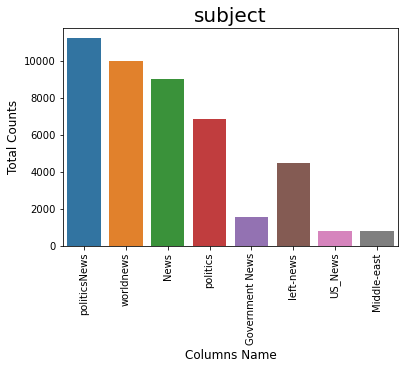

Fake    23478
True    21211
Name: Class_Labels, dtype: int64


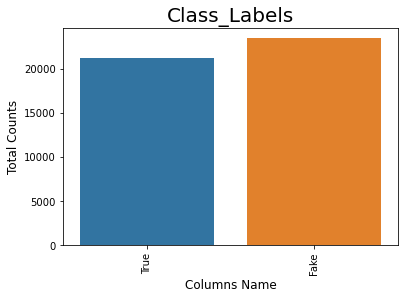

In [29]:
column=['subject', 'Class_Labels']
for i in column:
    plt.figure(figsize=(6,4))
    print(df[i].value_counts()[:5])
    sns.countplot(x=i,data=df,)
    plt.title(i,fontsize=20)
    plt.xlabel("Columns Name",fontsize=12)
    plt.xticks(rotation=90)
    plt.ylabel("Total Counts",fontsize=12)
    plt.show()

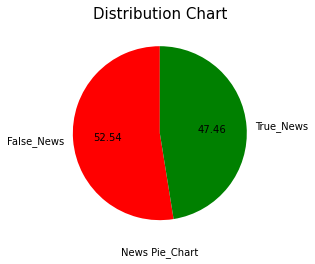

In [30]:
plt.figure(figsize=(6,4))
plt.pie(df['Class_Labels'].value_counts(),labels=['False_News','True_News'],autopct="%0.02f",colors=['red','green'], startangle=90)
plt.title("Distribution Chart",fontsize=15)
plt.xlabel("News Pie_Chart",fontsize=10)
plt.show()

#### OBSERVATIONS

1. PoliticsNews having 11220 maximum news and Middle-East having maximum Fake.
2. Counts of Fake News are high.

### Replace Values

### Total Characters

In [31]:
df['Total_characters']=df['text'].apply(len)

### Total Words

In [32]:
df['Total_words']=df['text'].apply(lambda word:len(nltk.word_tokenize(word)))

### Total Sentence

In [33]:
df['Total_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

Minimum Character : 1 
Maximum Characters : 51794


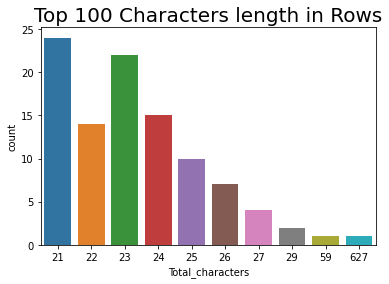

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Total_characters"].value_counts()[:100],data=df)
plt.title("Top 100 Characters length in Rows",fontsize=20)
print("Minimum Character :",df['Total_characters'].min(),"\nMaximum Characters :",df['Total_characters'].max())

Minimum Sentences : 0 
Maximum Sentences : 321


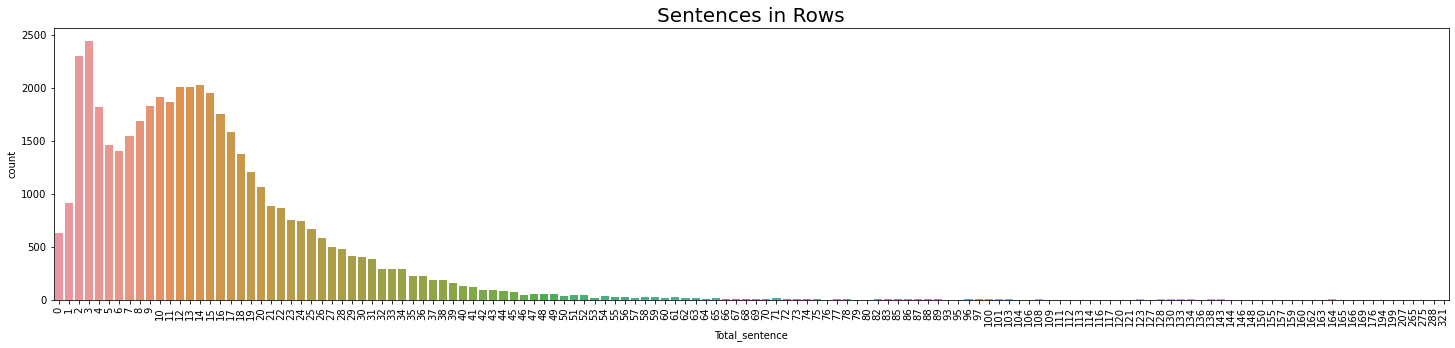

In [35]:
plt.figure(figsize=(25,5))
sns.countplot(x=df['Total_sentence'],data=df)
plt.title("Sentences in Rows",fontsize=20)
print("Minimum Sentences :",df['Total_sentence'].min(),"\nMaximum Sentences :",df['Total_sentence'].max())
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

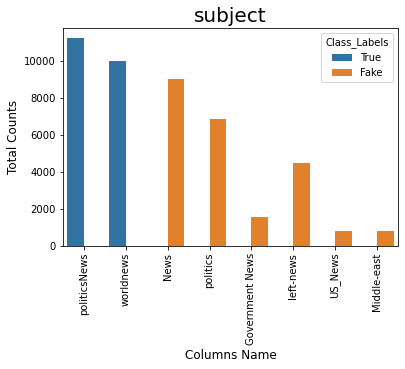

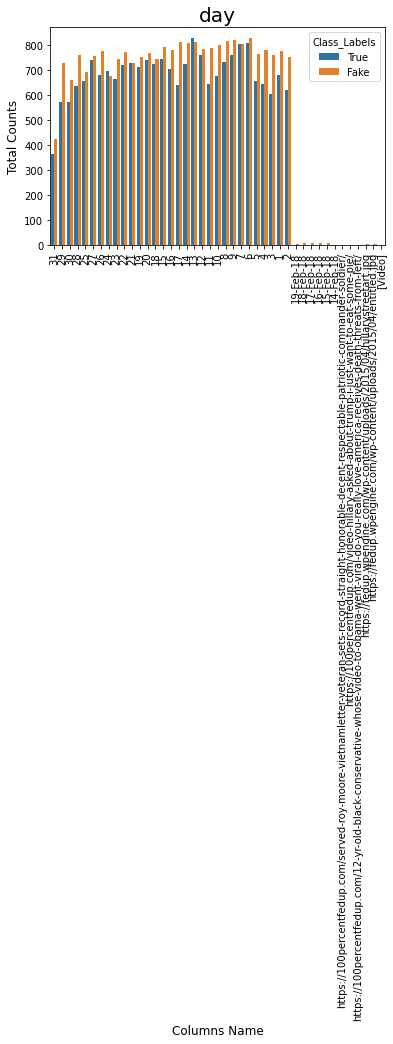

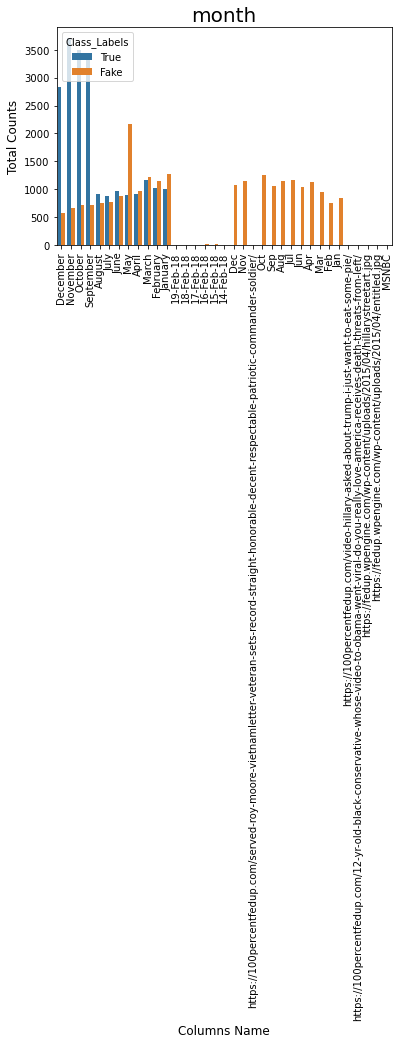

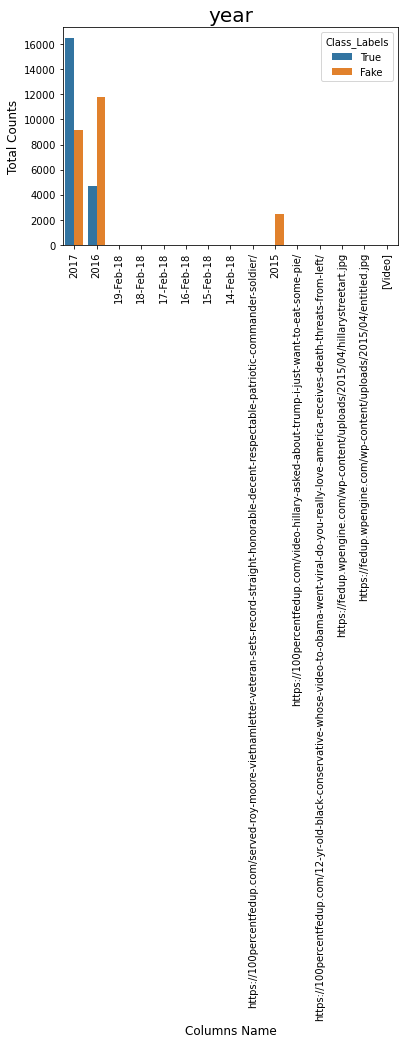

In [36]:
column=['subject','day', 'month', 'year']

for i in column:
    plt.figure(figsize=(6,4))
    sns.countplot(x=i,data=df,hue=df['Class_Labels'])
    plt.title(i,fontsize=20)
    plt.xlabel("Columns Name",fontsize=12)
    plt.xticks(rotation=90)
    plt.ylabel("Total Counts",fontsize=12)
    plt.show()

### Observations

- Subject column Shows maximum news are fake.
- As the month ends the fake news increases.
- August,July,June,May,April,March,February,January has maximum false news
- September,October,November,December the Having True News
- Maximum false News in May
- False news counts are less in 2017 on compare with 2015 and 2016

### Unique Values

In [37]:
print("Class_Labels :",df['Class_Labels'].unique())

Class_Labels : ['True' 'Fake']


In [38]:
# replace class labels
df['Class_Labels']=df['Class_Labels'].replace(['True','Fake'],[0,1])

### HAM VS SPAM

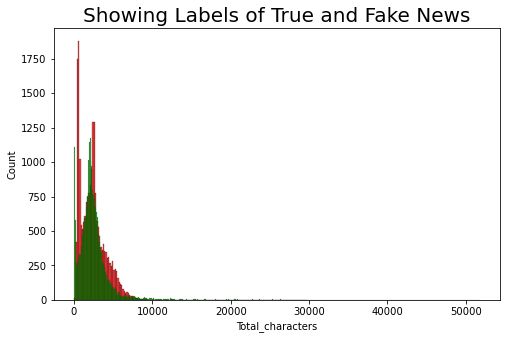

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Class_Labels']==0]['Total_characters'],color='red')
sns.histplot(df[df['Class_Labels']==1]['Total_characters'],color='green')
plt.title("Showing Labels of True and Fake News",fontsize=20)
plt.show()

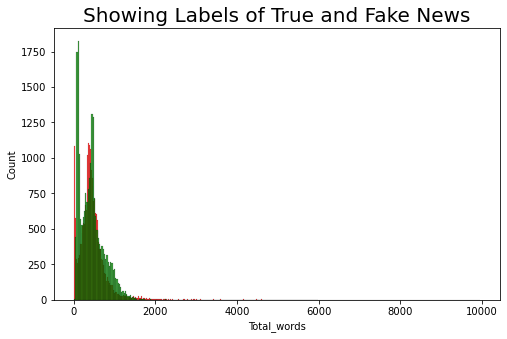

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Class_Labels']==1]['Total_words'],color='red')
sns.histplot(df[df['Class_Labels']==0]['Total_words'],color='green')
plt.title('Showing Labels of True and Fake News',fontsize=20)
plt.show()

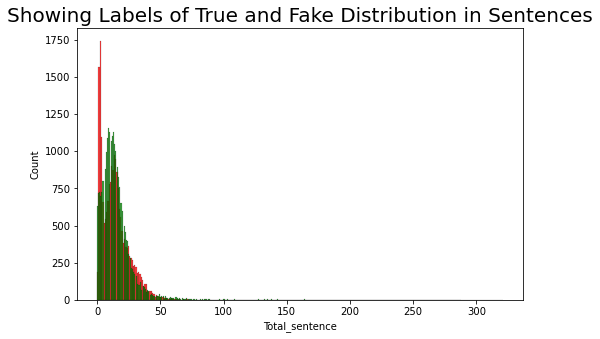

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Class_Labels']==0]['Total_sentence'],color='red')
sns.histplot(df[df['Class_Labels']==1]['Total_sentence'],color='green')
plt.title("Showing Labels of True and Fake Distribution in Sentences",fontsize=20)
plt.show()

### Multi-variate Graph

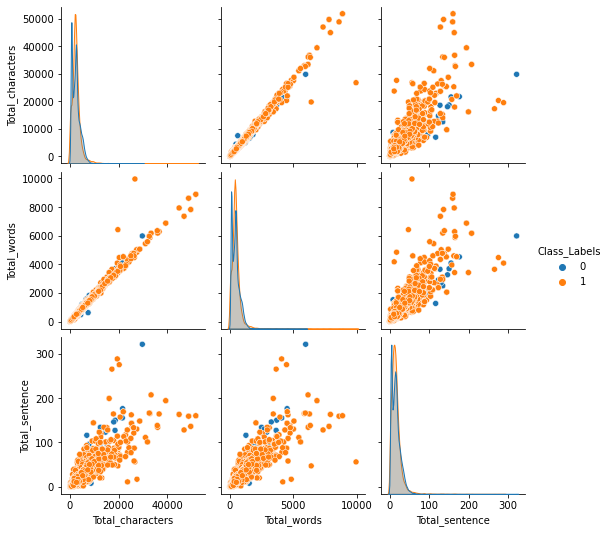

In [42]:
sns.pairplot(data=df,hue='Class_Labels')

## Discriptive Graph

In [43]:
df.describe()

,Class_Labels,Total_characters,Total_words,Total_sentence
count,44689.000000,44689.000000,44689.000000,44689.000000
mean,0.525364,2467.098682,453.108326,14.820940
std,0.499362,2173.612347,395.124933,12.626959
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1232.000000,225.000000,7.000000
50%,1.000000,2185.000000,403.000000,13.000000
75%,1.000000,3101.000000,571.000000,19.000000
max,1.000000,51794.000000,9958.000000,321.000000


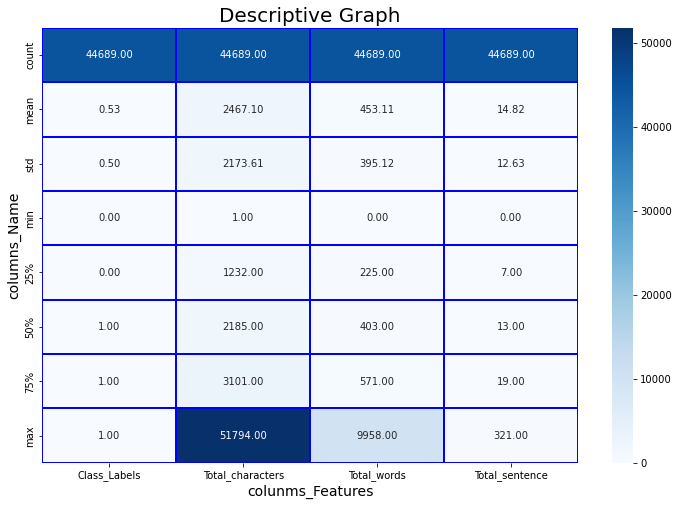

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor='blue',cmap='Blues',fmt='0.2f')
plt.title("Descriptive Graph",fontsize=20)
plt.xlabel('colunms_Features',fontsize=14)
plt.ylabel('columns_Name',fontsize=14)
plt.show()

In [45]:
df.corr()['Class_Labels'].sort_values()

Total_sentence      0.003034
Total_characters    0.038944
Total_words         0.045136
Class_Labels        1.000000
Name: Class_Labels, dtype: float64

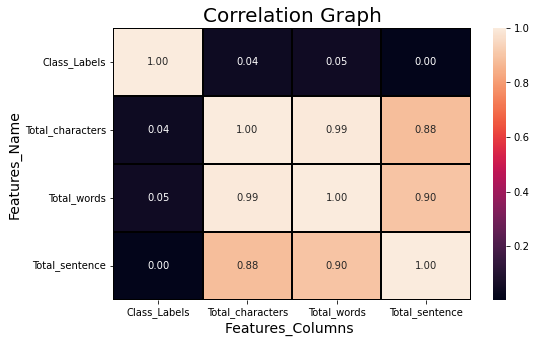

In [46]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr().T,annot=True,fmt='0.02f',linewidths=0.20,linecolor='black')
plt.title("Correlation Graph",fontsize=20)
plt.xlabel("Features_Columns ",fontsize=14)
plt.ylabel("Features_Name",fontsize=14)
plt.show()

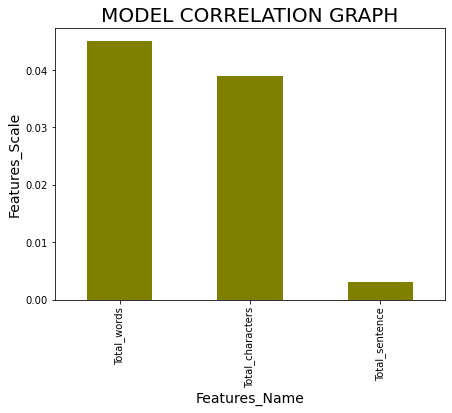

In [47]:
plt.figure(figsize=(7,5))
df.corr()['Class_Labels'].sort_values(ascending=False).drop("Class_Labels").plot(kind='bar',color='olive')
plt.title("MODEL CORRELATION GRAPH",fontsize=20)
plt.xlabel("Features_Name",fontsize=14,rotation=0)
plt.ylabel("Features_Scale",fontsize=14)
plt.show()

### Observation
- Total_characters have zero correlated with Target Variable
- Total_Words have have one correlation with the Target Variable
- Total_sentences have zero correlation with the Target Variable

### Dropping unwanted Columns*

In [48]:
df.columns

Index(['text', 'subject', 'date', 'Class_Labels', 'year', 'month', 'day',
       'Total_characters', 'Total_words', 'Total_sentence'],
      dtype='object')

In [49]:
df.drop( ['subject', 'date', 'year', 'month', 'day','Total_characters', 'Total_words', 'Total_sentence'],axis=1,inplace=True)

In [50]:
df.columns

Index(['text', 'Class_Labels'], dtype='object')

### Data Pre-Processing

- Lower case
- Tokenization
- Removing Stop Words and Punctuation
- POS
- Steamming or Lemmatization

In [51]:
def transform(text):
    text=text.lower() # make in lower case
    text=nltk.word_tokenize(text) # tokenized each word
    corpus=[] 
    for i in text:
        if i.isalnum():# if text is alpha-numerical
            corpus.append(i) # append text
        
    new_corpus=corpus.copy() # making a copy
    corpus.clear() # clearing corpus
    
    for i in new_corpus: # from new corpus
        if i not in stopwords.words("english") and i not in string.punctuation: # using stop words of english language and all punctuations
            corpus.append(i) # appending 

    new_corpus=corpus.copy() # making a copy
    corpus.clear() #clearing the copy
    
    ps=PorterStemmer() #importing Porter Stemmer
    for i in new_corpus:
        corpus.append(ps.stem(i)) # used stemming process
    return " ".join(corpus)

### Testing Function

In [52]:
df['text'][10]

'(Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. Moore declined to concede defeat even after Trump urged him to do so. He 

In [53]:
# using transformation
transform(df['text'][10])

'reuter alabama offici thursday certifi democrat doug jone winner state senat race state judg deni challeng republican roy moor whose campaign derail accus sexual misconduct teenag girl jone vacant seat vote percentag point elect offici said made first democrat quarter centuri win senat seat alabama seat previous held republican jeff session tap presid donald trump attorney gener state canvass board compos alabama secretari state john merril governor kay ivey attorney gener steve marshal certifi elect result seat jone narrow republican major senat 51 100 seat statement jone call victori new chapter pledg work parti moor declin conced defeat even trump urg stood claim fraudul elect statement releas certif said regret media outlet report alabama judg deni moor request block certif result 12 elect decis shortli canvass board met moor challeng alleg potenti voter fraud deni chanc victori file wednesday montgomeri circuit court sought halt meet schedul ratifi jone win thursday moor could as

In [54]:
df['Transformed_Text']=df['text'].apply(transform)
df.sample()

,text,Class_Labels,Transformed_Text
38389,"Former CIA Agent, Clare Lopez has been ringing...",1,former cia agent clare lopez ring alarm bell i...


In [55]:
print("New Length for Row 1 is ",len(df['Transformed_Text'][0]))

New Length for Row 1 is  2855


### Word Cloud

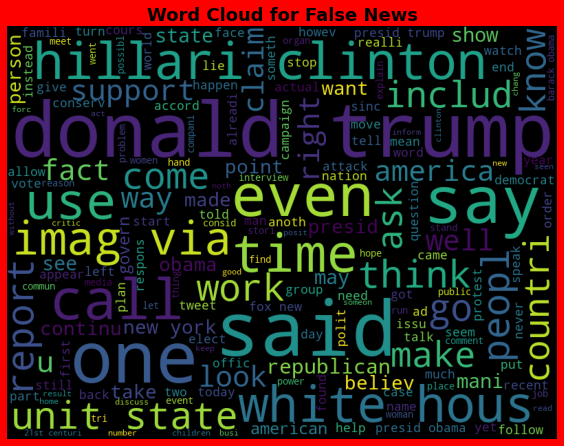

In [56]:
# Frequent uses of words
# importing word clouds
from wordcloud import WordCloud
# using features of wordclouds
wc=WordCloud(width=800,height=600,min_font_size=11,background_color='black')
# generating a cloud of words
spam_wordcloud=wc.generate(df[df['Class_Labels']==1]['Transformed_Text'].str.cat(sep=' '))

# ploting using plt
plt.figure(figsize=(8,7),facecolor='red')
plt.imshow(spam_wordcloud)
plt.title('Word Cloud for False News',fontsize=18,fontweight ='bold',)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

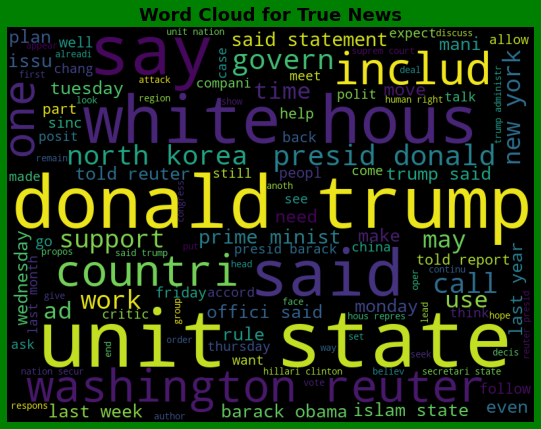

In [57]:
# using features of wordclouds
wc=WordCloud(width=800,height=600,min_font_size=11,background_color='black')
# generating a cloud of words
spam_wordcloud=wc.generate(df[df['Class_Labels']==0]['Transformed_Text'].str.cat(sep=' '))

# ploting using plt
plt.figure(figsize=(8,6),facecolor='green')
plt.imshow(spam_wordcloud)
plt.title('Word Cloud for True News',fontsize=18,fontweight ='bold',)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

### MODEL BUILDING
- Bag of Words(CountVectorizer)
- TF-IDF
- Word2vec

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(max_features=3000)
x=vec.fit_transform(df['Transformed_Text']).toarray()

In [59]:
print("The Shape of X :",x.shape)

The Shape of X : (44689, 3000)


In [60]:
y=df['Class_Labels']
print("The shape of y: ",y.shape)

The shape of y:  (44689,)


### Importing Library:

In [61]:
from sklearn.model_selection import train_test_split

# Metrics Used
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_score

# Naive_Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Another Models
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# creating instances
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

# Another Models
lg=LogisticRegression()
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()
sgd=SGDClassifier()
mlp=MLPClassifier()

models=[gnb,mnb,bnb,lg,rfc,etc,gbc,sgd,mlp] # different models

### Applying Train Test

In [62]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.20)

print("Shape x train ",x_train.shape," x test",x_test.shape)
print("shape y train ",y_train.shape," y_test",y_test.shape)

Shape x train  (35751, 3000)  x test (8938, 3000)
shape y train  (35751,)  y_test (8938,)


# running loop on list of models
for m in models:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    # printing result
    print("******"*5,"\n",m,"\n","******"*5)
    print("Training Score",score,"And Precision Score",precision_score(y_test, pred_test)*100)
    print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
    print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
    print("Classification Report \n",classification_report(y_test,pred_test))
    
    print(" *"*5,"\n MODEL CROSSVALIDATION")
    
    #train test Accuracy
    train_accuracy=accuracy_score(y_train,pred_train)
    test_accuracy =accuracy_score(y_test,pred_test)

    #Range finding cv Score
    for i in range(2,6):
        cv_score=cross_val_score(m,x,y,cv=i)
        cv_mean=cv_score.mean()
        print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)
    
    
    # Graph representing Auc_Roc_Graph
    from sklearn.metrics import roc_curve,auc
    fpr,tpr,thresholds= roc_curve(pred_test,y_test)
    roc_auc =auc(fpr,tpr)

    #ploting graph
    plt.figure()
    plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receive operating characteristic")
    plt.legend(loc="lower right")
    plt.show()


### Hyper-Parameter (Finding The best Model)

- Almost all the model working with highest score of approx 99 percent.

- Selected Two models for on the basis of precision which is True positives/ (True positives + False positives) and cv_score

- Model Training Score 0.9999720287544405 And Precision Score 99.82646420824295 (Ramdom Forest)

- Model Training Score 0.9968392492517691 And Precision Score 99.71671388101983 (Gradient Boosting)


### Model1 (Random-Forest)


In [63]:
# importing library
from sklearn.model_selection import GridSearchCV

#parameters used for search
param={"criterion":['gini', 'entropy', 'log_loss']}

#creating instance
gsv=GridSearchCV(rfc,param, cv=5)

# training model
gsv.fit(x_train,y_train)

#finding best parameters and Best Score
print("Best Params: ",gsv.best_params_,"\nBest_Score ",gsv.best_score_)

Best Params:  {'criterion': 'gini'} 
Best_Score  0.9970070947092344


In [64]:
# model called as per best parameters
rfc=RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=4)

# score determined
rfc_score=rfc.fit(x_train,y_train)

# train and test score
pred_test=rfc.predict(x_test)
pred_train=rfc.predict(x_train)

# Model score 
print("Training Score",rfc_score,"And Precision Score",precision_score(y_test, pred_test)*100)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Training Score RandomForestClassifier(min_samples_split=4) And Precision Score 99.71843188217457
Accuracy Training Score = 0.9999440575088808  Accuracy Test Score = 0.9976504810919669 

Training Confusion_Matrix 
 [[16884     1]
 [    1 18865]] Testing Confusion_Matrix 
 [[4313   13]
 [   8 4604]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4326
           1       1.00      1.00      1.00      4612

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

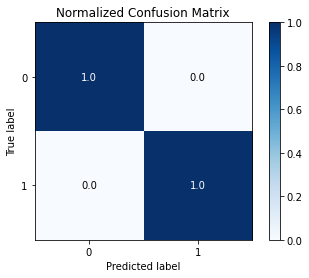

In [65]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_test, normalize=True)

In [66]:
#train test Accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#Range finding cv Score
for i in range(2,6):
    cv_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.9778471808456987 Training Score  0.9999440575088808 Testing Score  0.9976504810919669
A cross-fold  3 CV_mean  0.9945176219709025 Training Score  0.9999440575088808 Testing Score  0.9976504810919669
A cross-fold  4 CV_mean  0.9937567612789886 Training Score  0.9999440575088808 Testing Score  0.9976504810919669
A cross-fold  5 CV_mean  0.9960168758445441 Training Score  0.9999440575088808 Testing Score  0.9976504810919669


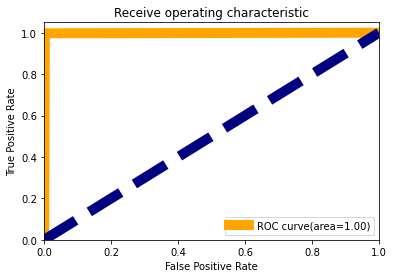

In [67]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Trial Method (Logistic Regression)

In [68]:
from sklearn.model_selection import GridSearchCV
grid_params={'penalty':['l1', 'l2', 'elasticnet'],
           'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
           'C':(0.001, 0.01, 0.1, 1, 10)}

gsv=GridSearchCV(lg,grid_params, cv=5)
gsv.fit(x_train,y_train)

print("Best Params: ",gsv.best_params_,"\nBest_Score ",gsv.best_score_)

Best Params:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'} 
Best_Score  0.9934547527706525


In [69]:
lg=LogisticRegression(penalty= 'l1', solver= 'liblinear')
lg_score=lg.fit(x_train,y_train)
pred_train1=lg.predict(x_train)
pred_test1=lg.predict(x_test)


print("Training Score",lg_score,"And Precision Score",precision_score(y_test, pred_test1)*100)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train1)," Accuracy Test Score =",accuracy_score(y_test,pred_test1),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train1),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test1))
print("Classification Report \n",classification_report(y_test,pred_test1))

Training Score LogisticRegression(penalty='l1', solver='liblinear') And Precision Score 99.54337899543378
Accuracy Training Score = 0.9942099521691701  Accuracy Test Score = 0.9938464980980085 

Training Confusion_Matrix 
 [[16816    69]
 [  138 18728]] Testing Confusion_Matrix 
 [[4305   21]
 [  34 4578]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4326
           1       1.00      0.99      0.99      4612

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



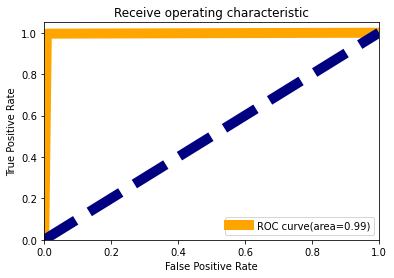

In [70]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds= roc_curve(pred_test1,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Saving Model

In [71]:
# loading pickle

import pickle
filename='fakenews_classification.pkl'
pickle.dump(rfc,open(filename,"wb"))

In [72]:
# loading pack file
pickled_model= pickle.load(open(filename,'rb'))
result=pickled_model.score(x_test,y_test)
print("Score Obtained",result*100)

Score Obtained 99.76504810919668


In [73]:
pd.set_option("display.max_columns",None)# max rows display
pd.set_option("display.max_rows",None) # max columns display

In [74]:
array=np.array(y_test)

conclude=pd.DataFrame([pickled_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclude

0     1     2     3     4     5     6     7     8     9     10    \
Predicted     1     0     1     1     0     1     0     1     1     1     1   
Original      1     0     1     1     0     1     0     1     1     1     1   

           11    12    13    14    15    16    17    18    19    20    21    \
Predicted     0     1     0     1     0     0     1     0     0     0     1   
Original      0     1     0     1     0     0     1     0     0     0     1   

           22    23    24    25    26    27    28    29    30    31    32    \
Predicted     1     1     1     1     0     0     1     0     0     0     1   
Original      1     1     1     1     0     0     1     0     0     0     1   

           33    34    35    36    37    38    39    40    41    42    43    \
Predicted     0     0     0     0     1     1     0     0     1     1     0   
Original      0     0     0     0     1     1     0     0     1     1     0   

           44    45    46    47    48    49    50    51    52    53    54    \
Predicted     0     1     0     1     0     1     0     0     0     0     0   
Original      0     1     0     1     0     1     0     0     0     0     0   

           55    56    57    58    59    60    61    62    63    64    65    \
Predicted     1     0     0     1     0     0     1     0     1     0     0   
Original      1     0     0     1     0     0     1     0     1     0     0   

           66    67    68    69    70    71    72    73    74    75    76    \
Predicted     1     1     0     1     0     1     0     0     1     0     0   
Original      1     1     0     1     0     1     0     0     1     0     0   

           77    78    79    80    81    82    83    84    85    86    87    \
Predicted     1     1     1     1     0     0     0     0     0     1     1   
Original      1     1     1     1     0     0     0     0     0     1     1   

           88    89    90    91    92    93    94    95    96    97    98    \
Predicted     1     0     0     1     0     0     0     1     0     0     1   
Original      1     0     0     1     0     0     0     1     0     0     1   

           99    100   101   102   103   104   105   106   107   108   109   \
Predicted     1     0     1     1     1     0     1     0     1     1     0   
Original      1     0     1     1     1     0     1     0     1     1     0   

           110   111   112   113   114   115   116   117   118   119   120   \
Predicted     0     1     1     0     0     1     0     0     1     0     1   
Original      0     1     1     0     0     1     0     0     1     0     1   

           121   122   123   124   125   126   127   128   129   130   131   \
Predicted     0     0     1     0     0     1     1     1     0     0     1   
Original      0     0     1     0     0     1     1     1     0     0     1   

           132   133   134   135   136   137   138   139   140   141   142   \
Predicted     1     1     0     1     1     0     0     0     1     1     0   
Original      1     1     0     1     1     0     0     0     1     1     0   

           143   144   145   146   147   148   149   150   151   152   153   \
Predicted     0     0     0     0     1     1     1     0     1     1     0   
Original      0     0     0     0     1     1     1     0     1     1     0   

           154   155   156   157   158   159   160   161   162   163   164   \
Predicted     1     1     0     1     0     1     0     1     0     1     1   
Original      1     1     0     1     0     1     0     1     0     1     1   

           165   166   167   168   169   170   171   172   173   174   175   \
Predicted     1     1     1     1     0     1     1     1     0     1     1   
Original      1     1     1     1     0     1     1     1     0     1     1   

           176   177   178   179   180   181   182   183   184   185   186   \
Predicted     1     1     1     1     0     1     1     0     1     1     1   
Original      1     1     1     1     0     1